## OR-tools example

In [11]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP
from optiwindnet.importer import load_repository

### Initialize Moray East

In [3]:
locations = load_repository()

In [ ]:
L = locations.moray

In [ ]:
cables = [(None, 3, 206), (None, 5, 287), (None, 7, 406)]
wfn = WindFarmNetwork.upload_L(L=L, cables=cables)

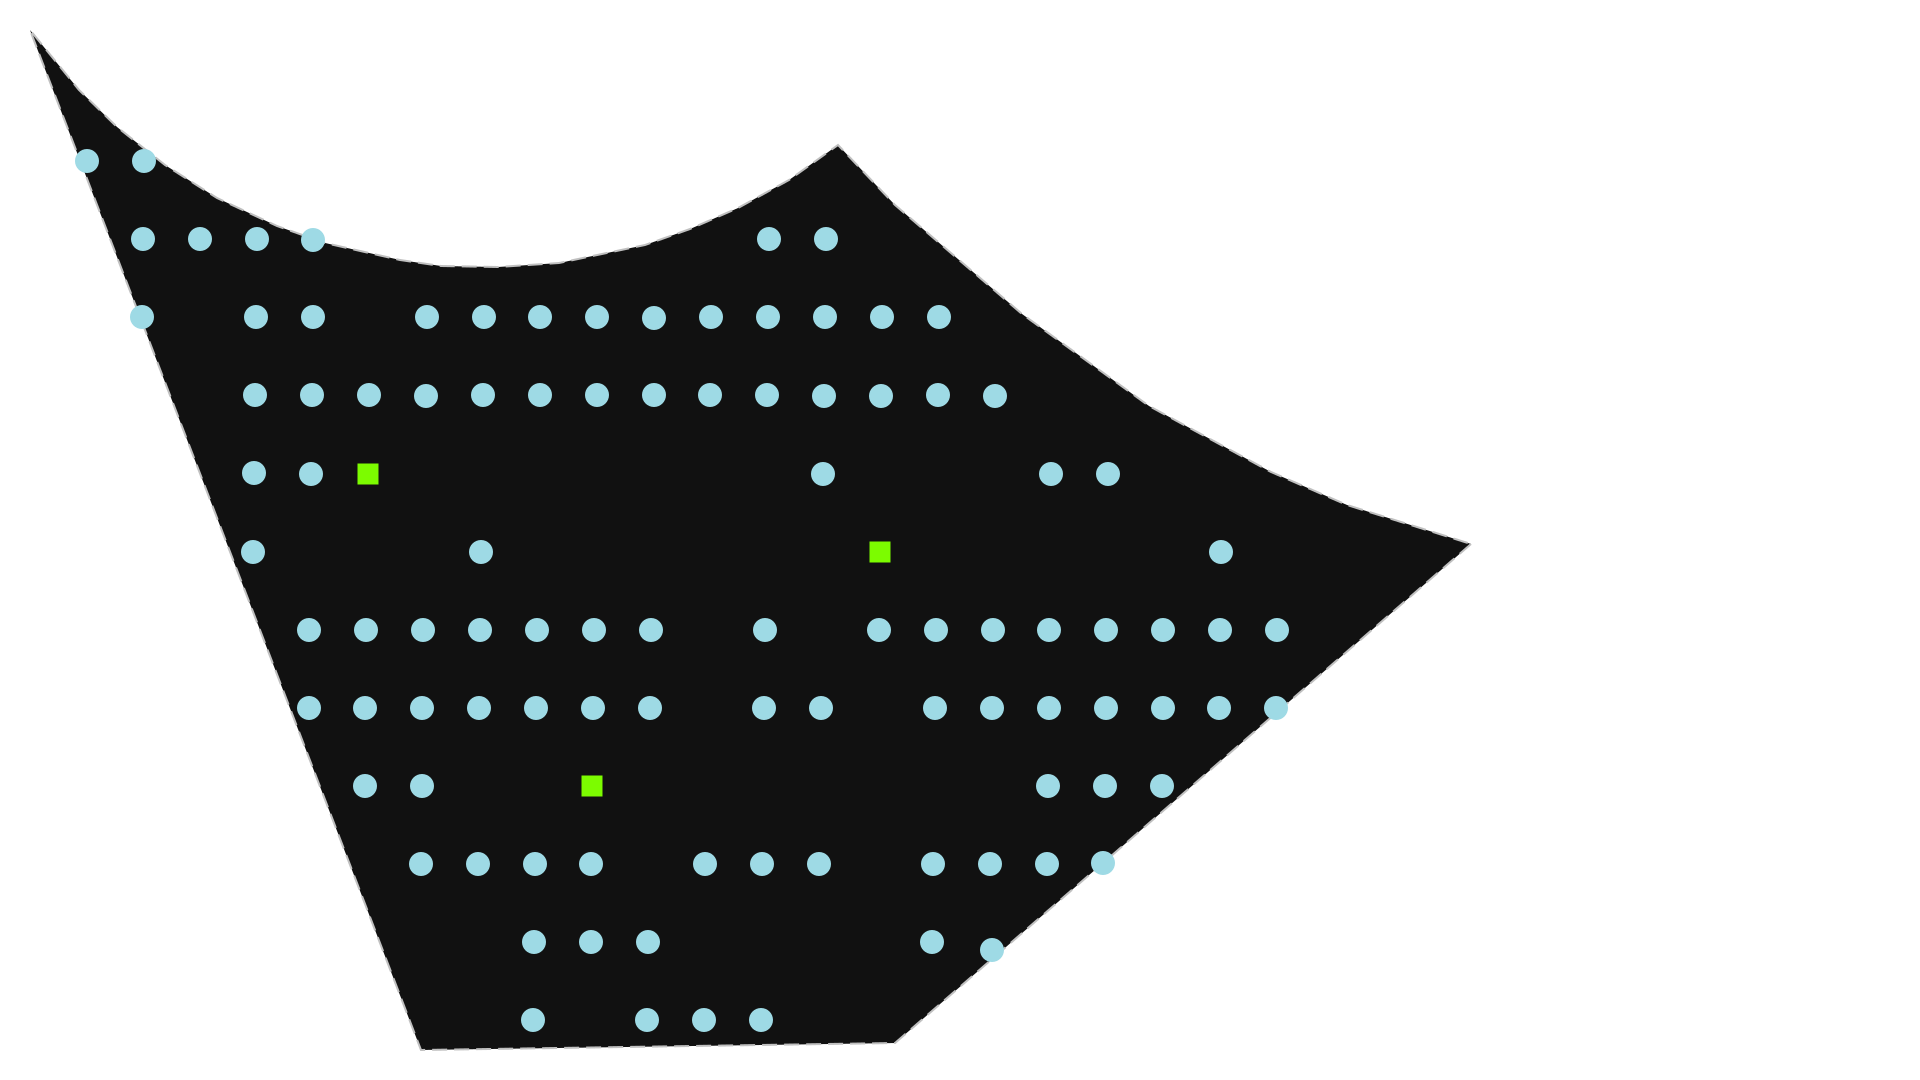

In [15]:
wfn.plot_L()

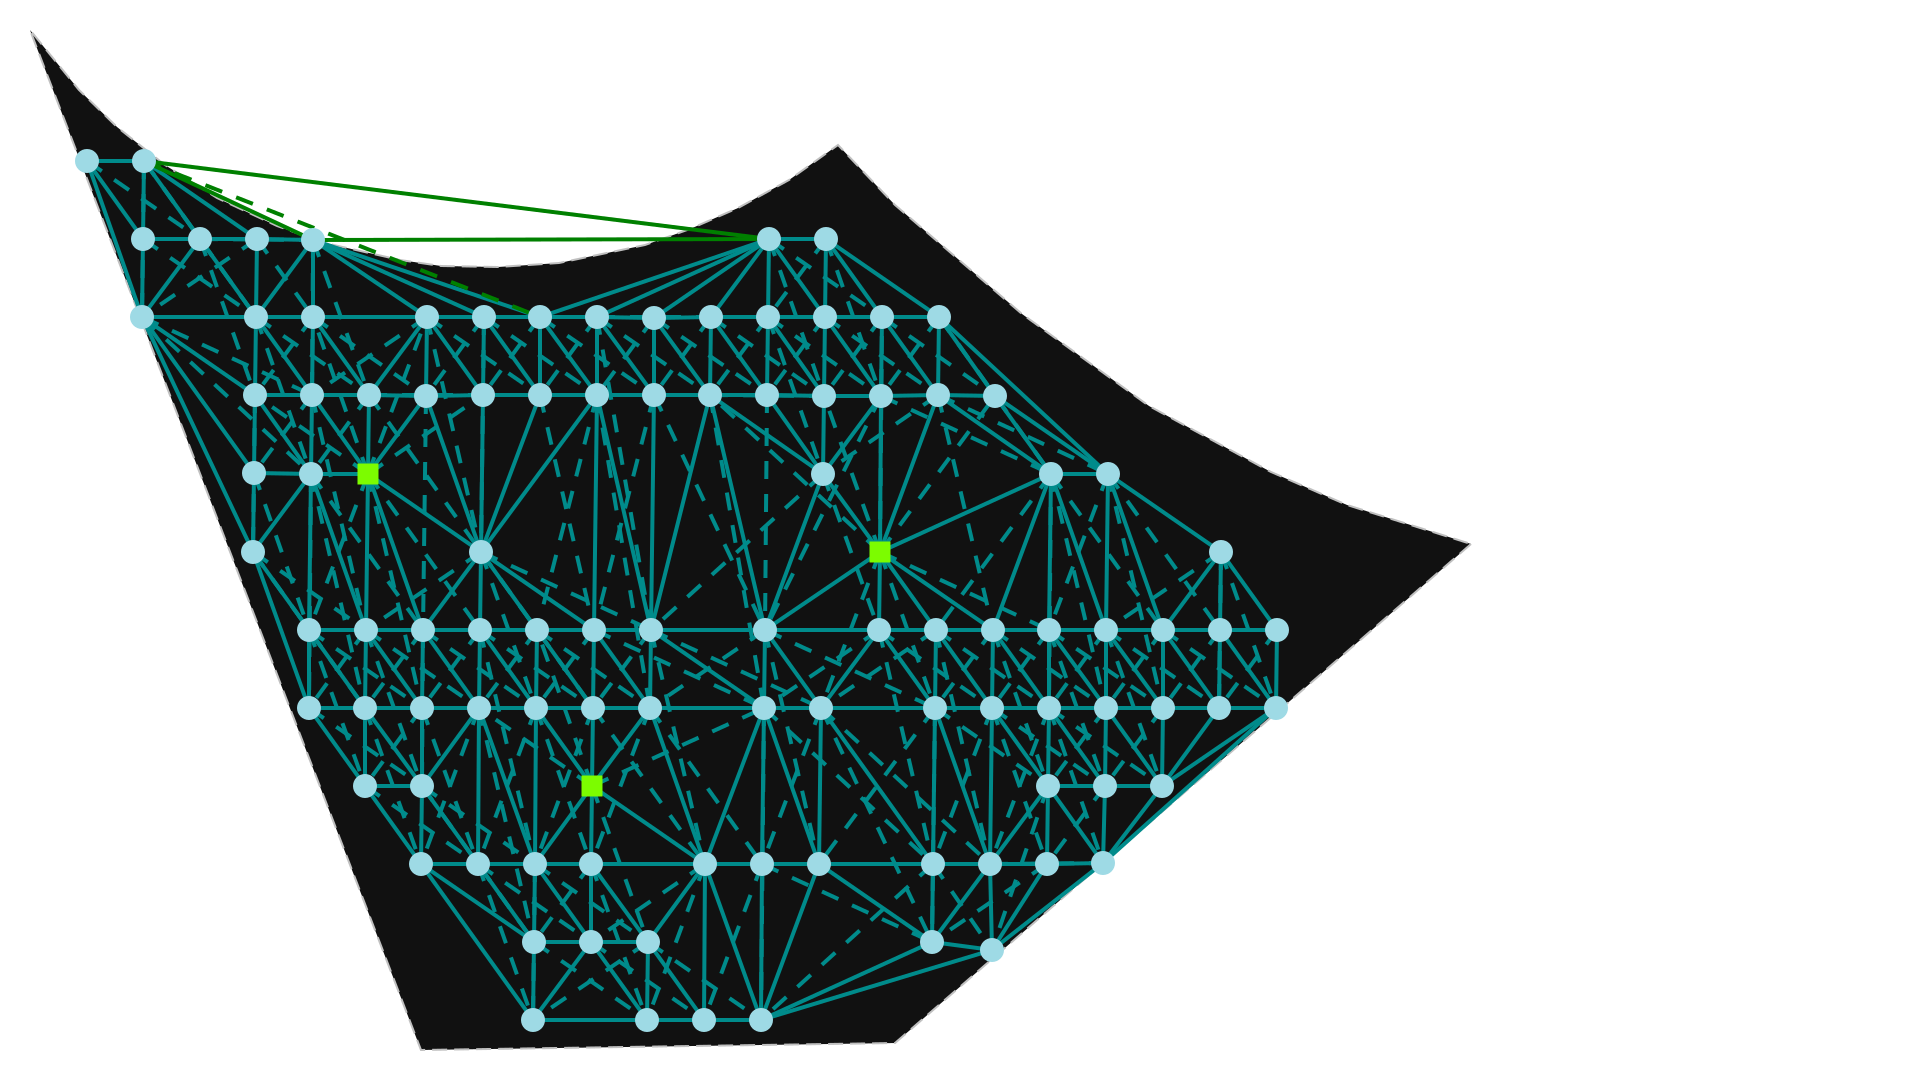

In [ ]:
wfn.plot_A()

### Optimize Moray East

Initial heuristic solution to warm-start the solver:

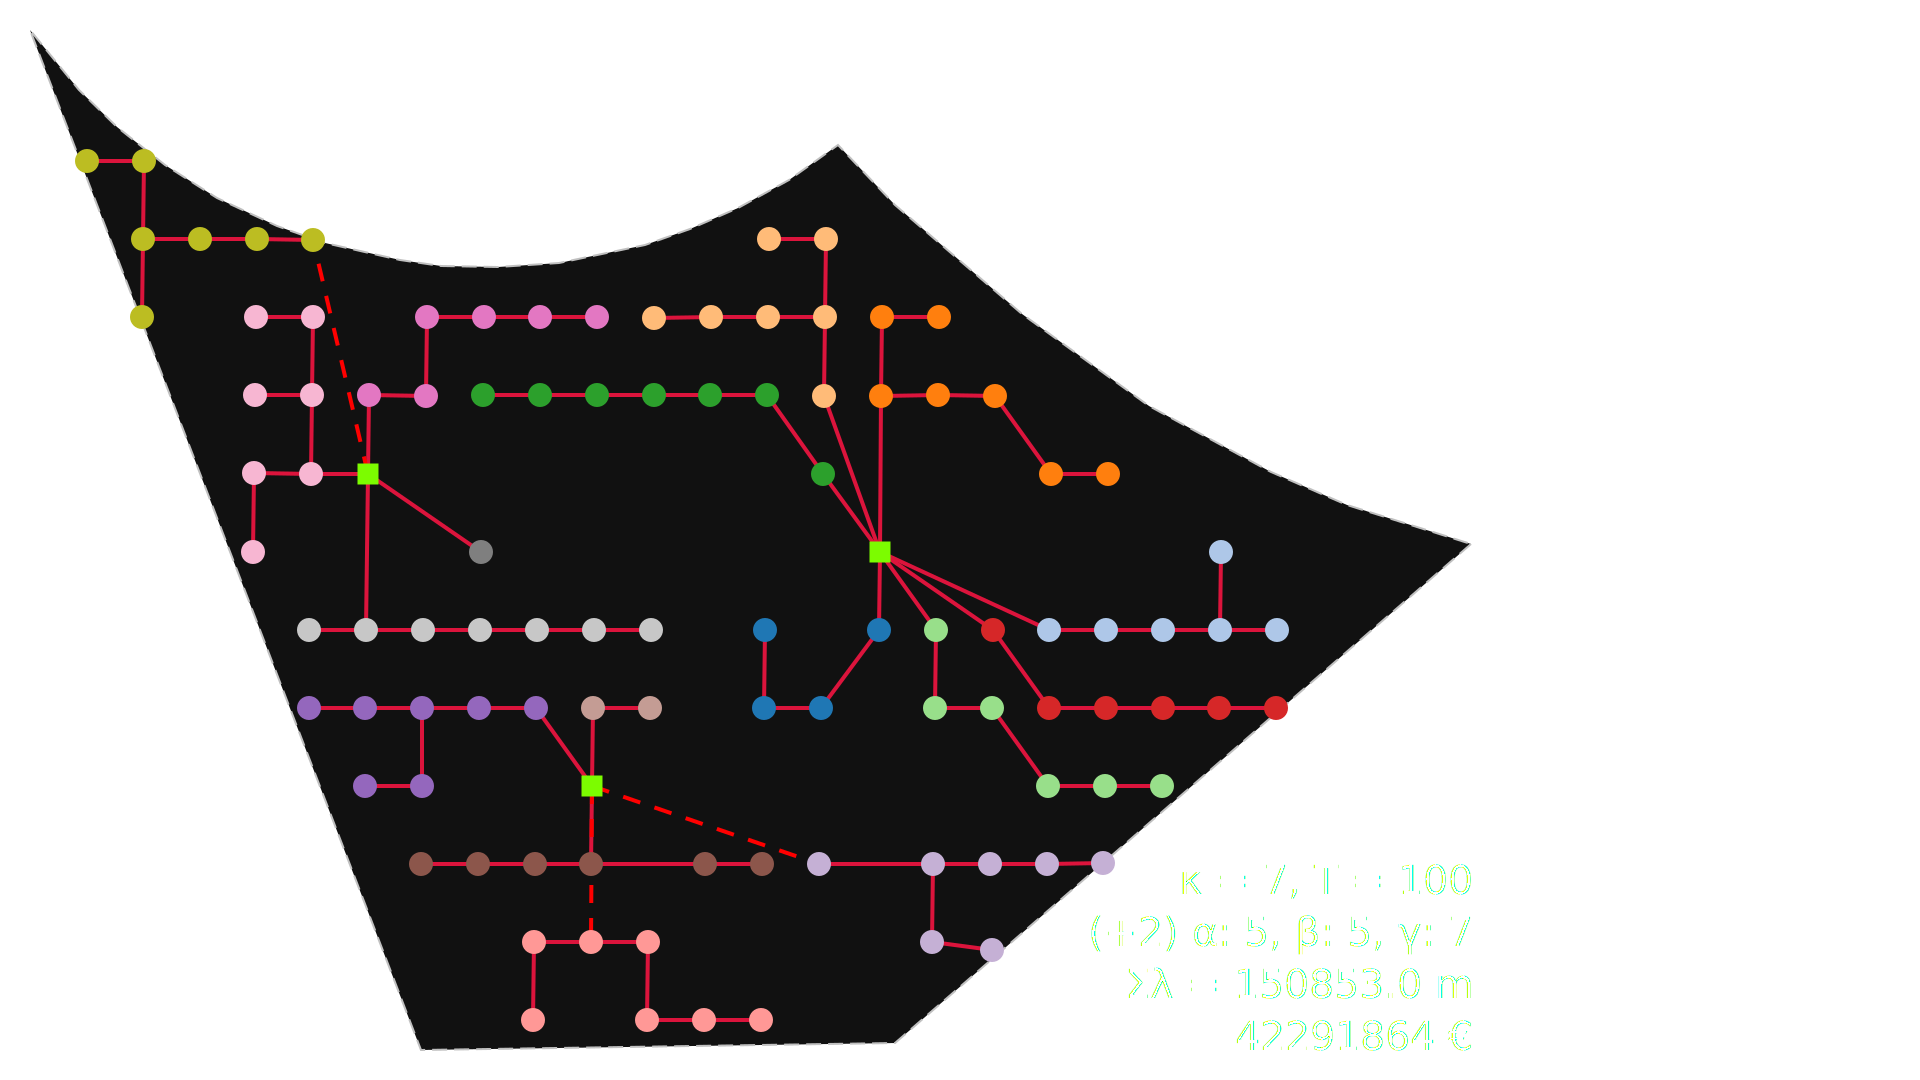

In [ ]:
router_pre_solver = Heuristic(solver='EW')
res_pre_solver= wfn.optimize(router=router_pre_solver)
wfn.plot()

In [25]:
solver_options=dict(
    max_time_in_seconds = 40,
    relative_gap_limit = 0.005,
    num_workers = 8,

# be verbose
log_search_progress = True,
# required to get the log inside the notebook (goes only to console otherwise)
log_callback = print,
)


model_options = {"gateXing_constraint": False,
                 "branching": True,
                 "gates_limit": False}

router = MILP(solver='ortools', solver_options=solver_options, model_options=model_options, detour=True)
res = wfn.optimize(router=router)

s is not None and warmup is run!

Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 40 log_search_progress: true relative_gap_limit: 0.005 num_workers: 8

Initial optimization model 'Moray East': (model_fingerprint: 0x5bfdb1f42b94f1aa)
#Variables: 2'428 (#bools: 757 in floating point objective)
  - 1'671 Booleans in [0,1]
  - 457 in [-6,6]
  - 300 in [0,7]
#kAtMostOne: 423 (#literals: 1'922)
#kLinear1: 3'342 (#enforced: 3'342)
#kLinearN: 103 (#terms: 2'571)

Starting presolve at 0.00s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 757 terms with magnitude in [1119.02, 18596.1] average = 4818.21
[Scaling] Objective coefficient relative error: 4.16209e-10
[Scaling] Objective worst-case absolute error: 9.47291e-05
[Scaling] Objective scaling factor: 1.04858e+06
  1.63e-03s  0.00e+00d  [DetectDominanceRelations] 
  2.81e-02s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #num_dual_strengtheni

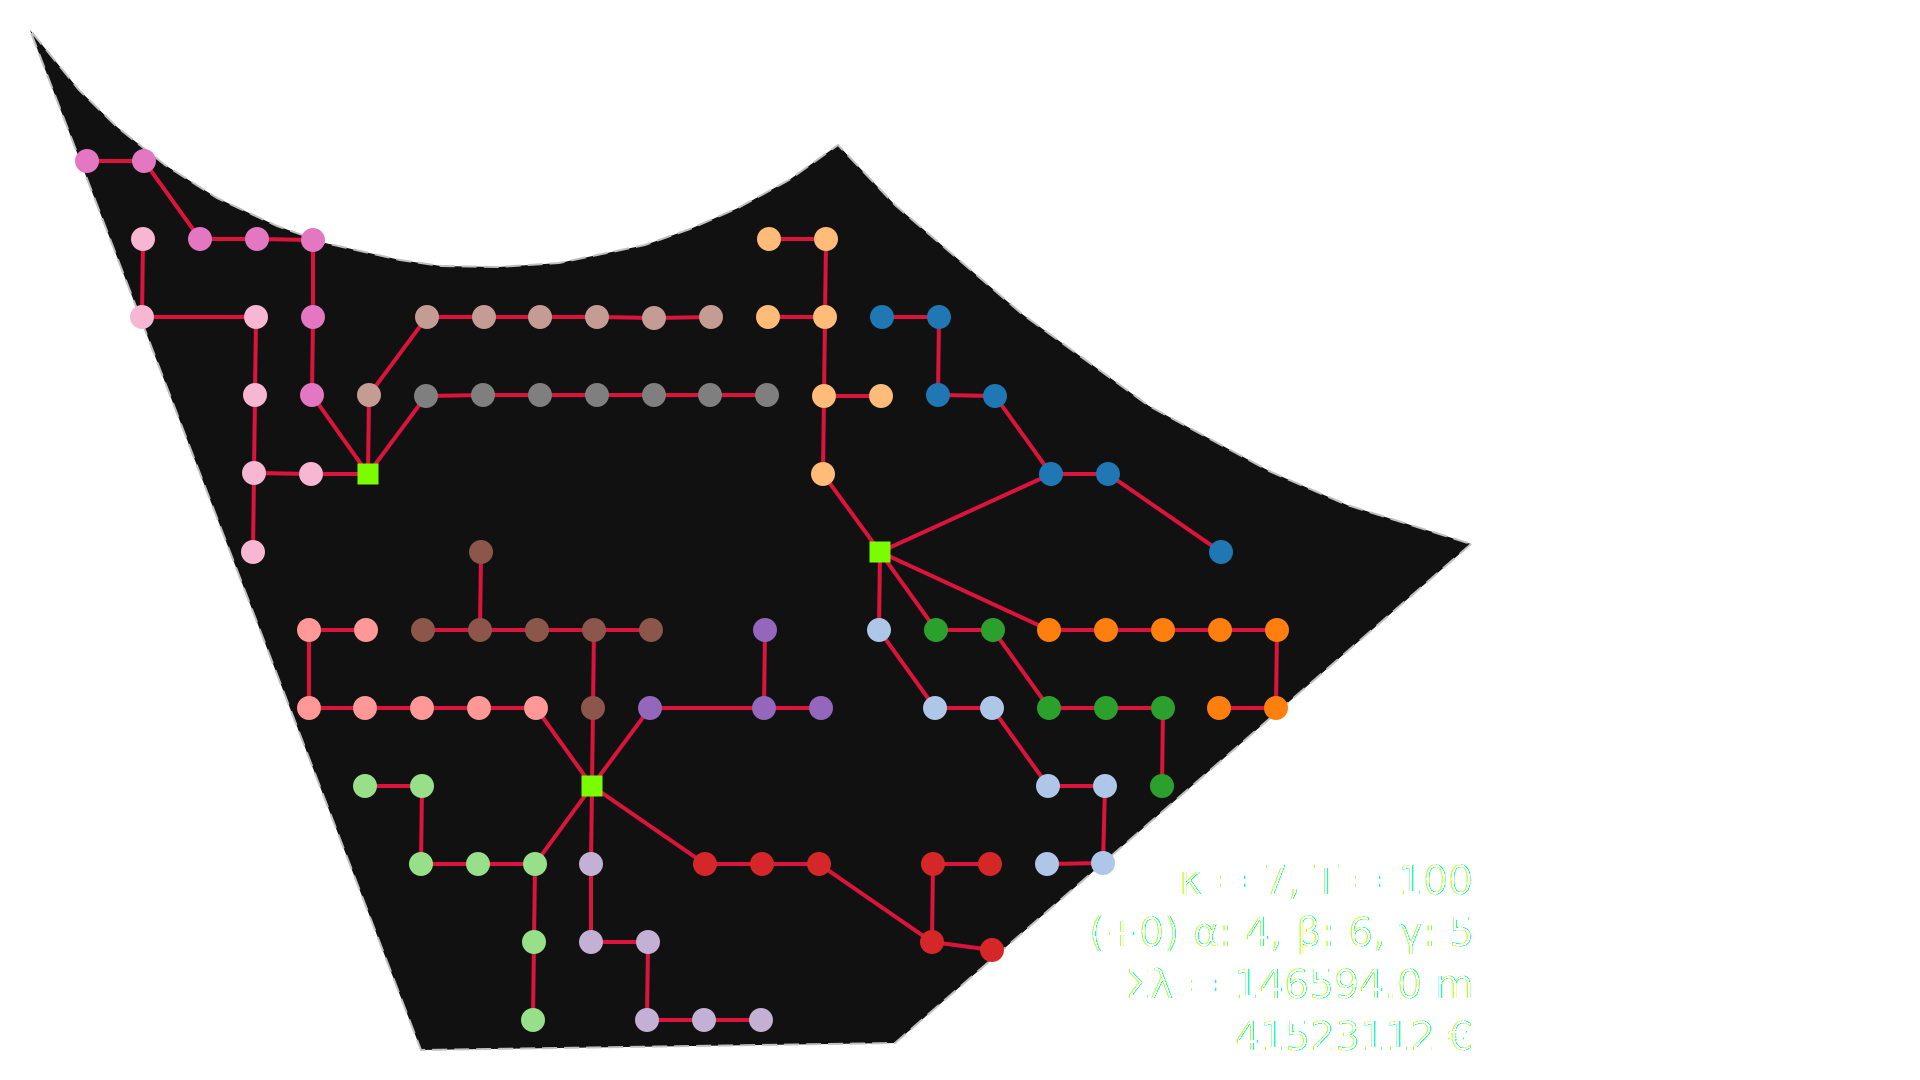

In [23]:
wfn.plot_G_tentative()

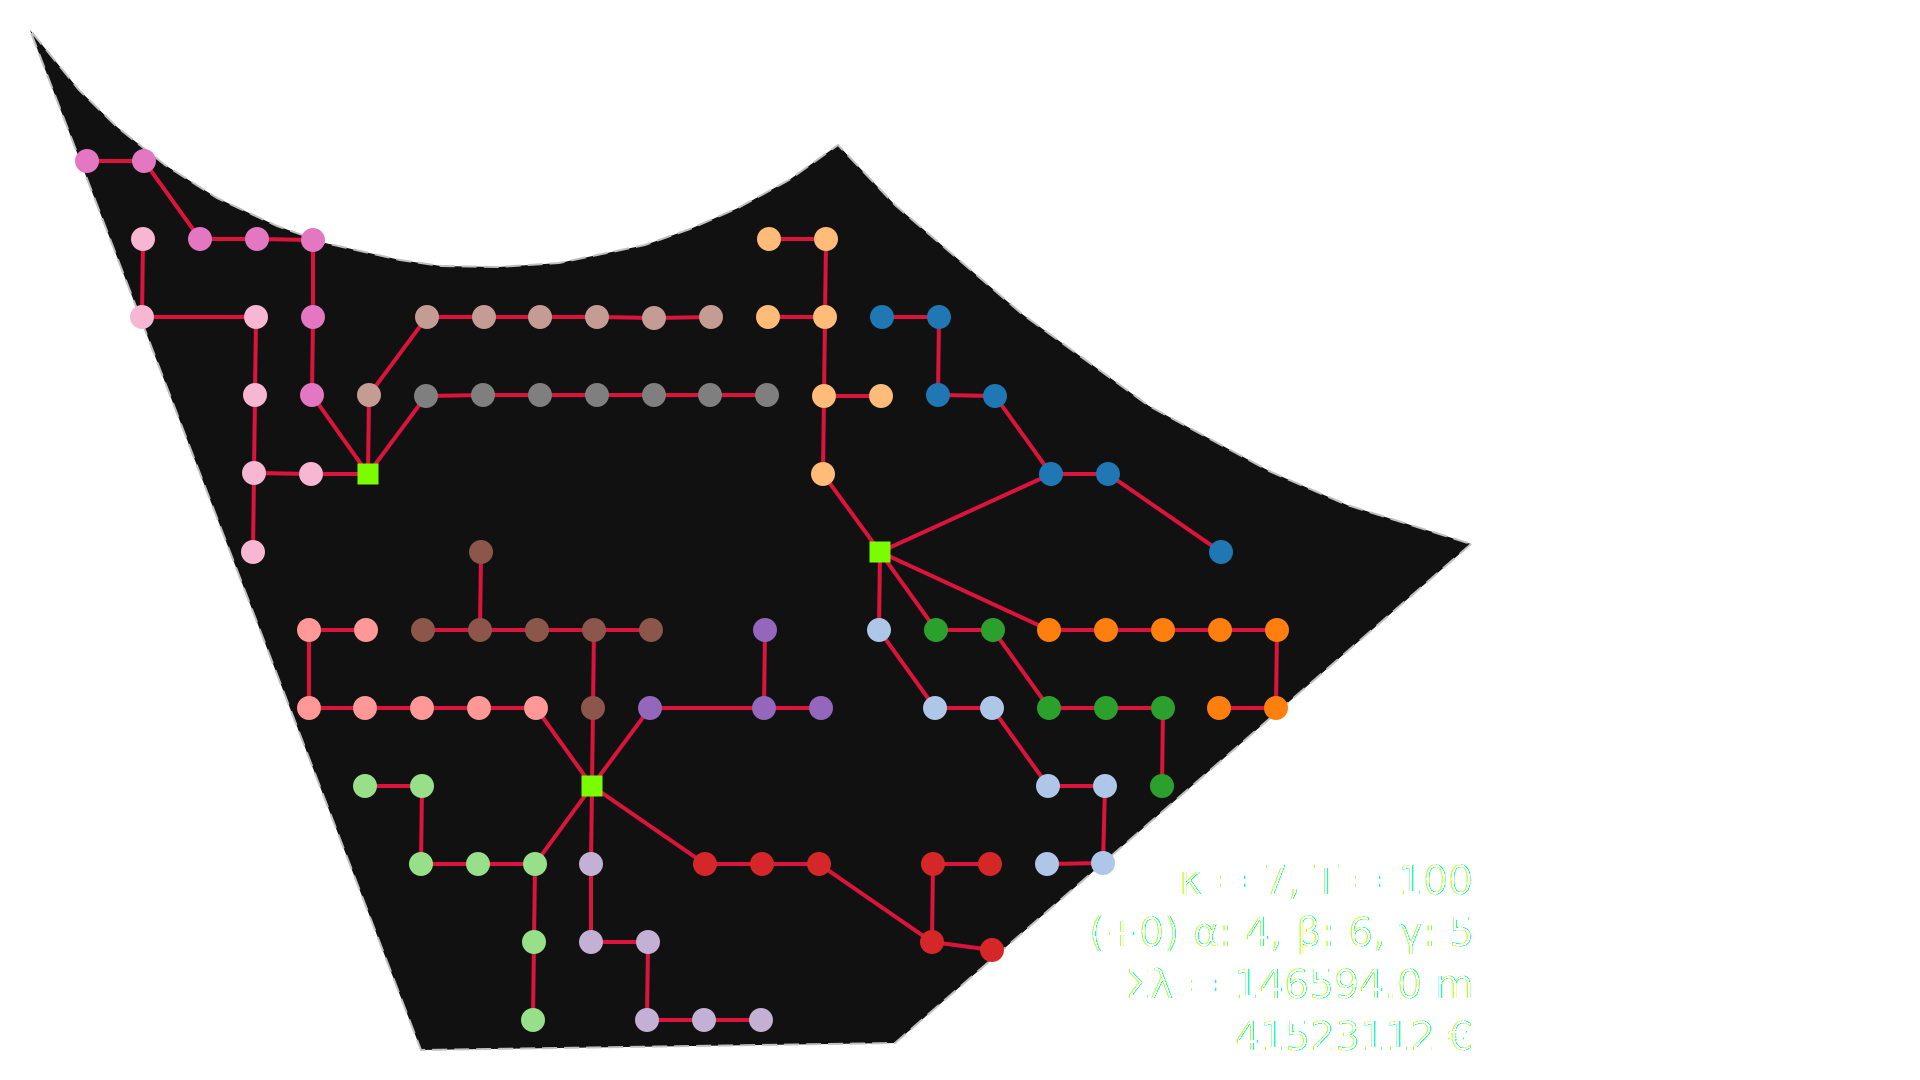

In [24]:
wfn.plot()